In [295]:
#Activity 3: K-means clustering with Pew Data (Time needed: 3-4 hours: Day 8)
#Pew Research Center [10] has been collecting data for a long time about social issues using
#survey approach. Study their home page here and the types of questions they try to answer
#using the data sets collected [4] and analyzed using scientific methods. We are especially
#interested in look at the data PRC collected about Gaming, Jobs and Broadband. We cleaned the
#data set in Lab 2. In the lab we will use at least 5 variables (columns) to cluster the data and
#understand the data. Interpret the cluster characteristics for various K = 3, 5.

In [296]:
library(dplyr)
inputData <-read.csv("/home/sunil/WorkSpace/R/DIC_Lab3/Data/pewData/pewData.csv",header=T)
inputData


pewData <- inputData[!is.na(inputData$sex) & !is.na(inputData$age) & !is.na(inputData$inc) & !is.na(inputData$race),]
pewData <- pewData[!is.na(pewData$state) & !is.na(pewData$form) & !is.na(pewData$hisp),]

pewData <- pewData[pewData$inc !='98' & pewData$inc !='99' & pewData$race!='8' & pewData$race !='9' & !is.na(pewData$q1),]
pewData <- pewData[pewData$hisp!='8' & pewData$hisp !='9' & pewData$age !='98' & pewData$age !='99'& pewData$age !='97',]

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737
100049,1,61015,1,R,1,42,1,1,1,⋯,1,2,NA,1,99,NA,NA,15748,1.387097,0.4428635
100051,1,61915,1,R,2,26,1,1,1,⋯,2,2,NA,1,7,NA,NA,49690,1.645161,0.5252567
100058,1,61015,1,R,3,40,2,1,2,⋯,5,2,NA,1,6,NA,NA,73655,1.000000,0.3192737
100059,1,61015,1,U,1,23,1,1,3,⋯,4,2,NA,1,3,NA,NA,4412,2.935484,0.9372228


## Cluster with K = 3

In [297]:
data <- pewData %>% select(age,sex,inc, race, state, form)

data

data2<-data

,age,sex,inc,race,state,form
2,63,2,6,2,24,2
3,86,2,3,1,39,2
4,40,2,6,1,37,2
5,65,2,3,1,21,1
6,69,2,8,1,20,1
8,70,1,7,1,26,1
9,77,1,6,1,40,2
10,73,1,3,1,23,1
13,52,1,8,1,27,1
14,74,2,6,1,12,1


In [298]:
#Normalization - By default the age is a continuous category. Here the age can be considered to be varying in a very large 
# values and this can cause the clustering inappropriate and create wrong clusters. Hence we introduced the Normalization 
# to the df so that the values remains in the set range as they can be comparable with the other values.
scale_age <- max(data$age)-min(data$age) + min(data$age)
scale_sex <- (max(data$sex)-min(data$sex)) + min(data$sex)
scale_inc <- (max(data$inc)-min(data$inc)) +min(data$inc)
scale_race <- (max(data$race)-min(data$race)) + min(data$race)
scale_state <- (max(data$state)-min(data$state)) + min(data$state)
scale_form <- (max(data$form)-min(data$form)) + min(data$form)

#Applying the normalization to the data to avoid the peaks or outliners in the data
data$age <- (data$age - min(data$age))/(max(data$age)-min(data$age))
data$sex <- (data$sex - min(data$sex))/(max(data$sex)-min(data$sex))
data$inc <- (data$inc - min(data$inc))/(max(data$inc)-min(data$inc))
data$race <- (data$race - min(data$race))/(max(data$race)-min(data$race))
data$state <- (data$state - min(data$state))/(max(data$state)-min(data$state))
data$form <- (data$form - min(data$form))/(max(data$form)-min(data$form))
#data$hisp <- (data$hisp - min(data$hisp))/(max(data$hisp)-min(data$hisp))

#data



In [299]:
#Find the kmean using the Normalized data frame
#data
#centers<-c(20,30,40)
centers <- 3
km <- kmeans(data, centers, iter.max = 10, nstart = 1,algorithm = c("Hartigan-Wong", "Lloyd", "Forgy","MacQueen"))
km

#Or without specifing the algorithm
km2 <- kmeans(data, centers)

K-means clustering with 3 clusters of sizes 443, 420, 783

Cluster means:
        age       sex       inc       race     state form
1 0.3913874 0.0000000 0.5451467 0.09796840 0.4868869    1
2 0.4327228 1.0000000 0.4845238 0.09857143 0.5027706    1
3 0.4060320 0.5095785 0.5108557 0.09629630 0.5061651    0

Clustering vector:
   2    3    4    5    6    8    9   10   13   14   16   17   18   20   21   22 
   2    2    2    3    3    3    1    3    3    3    2    1    1    1    3    3 
  23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38 
   2    1    1    3    3    2    2    2    2    3    1    1    2    2    2    3 
  39   40   41   42   43   44   45   47   49   50   51   52   53   55   56   57 
   3    3    3    3    2    2    1    1    1    2    3    3    2    2    3    3 
  58   59   60   61   63   64   66   67   68   69   70   71   72   73   76   77 
   2    2    2    3    1    1    3    2    3    2    2    2    3    3    2    3 
  79   80   82   83   84  

In [300]:
km_result <- km2[2]
km_result
#km_result1

km2[2]
km_scale <- as.data.frame(km_result$centers)
#km_scale <- as.data.frame(km_scale)

#Converting the Scaled value to the normal value
km_scale$age <-  (km_scale$age)*scale_age
km_scale$sex <-  (km_scale$sex)*scale_sex
km_scale$inc <-  (km_scale$inc)*scale_inc
km_scale$race <-  (km_scale$race)*scale_race
km_scale$state <-  (km_scale$state)*scale_state
km_scale$form <-  (km_scale$form)*scale_form
km_scale

,age,sex,inc,race,state,form
1,0.4271313,1,0.4829060,0.09255189,0.4943501,0.5128205
2,0.3902244,0,0.5416667,0.10677083,0.5276515,0.0000000
3,0.3913874,0,0.5451467,0.09796840,0.4868869,1.0000000


,age,sex,inc,race,state,form
1,0.4271313,1,0.4829060,0.09255189,0.4943501,0.5128205
2,0.3902244,0,0.5416667,0.10677083,0.5276515,0.0000000
3,0.3913874,0,0.5451467,0.09796840,0.4868869,1.0000000


age,sex,inc,race,state,form
41.00460,2,4.346154,0.5553114,27.68361,1.025641
37.46154,0,4.875000,0.6406250,29.54848,0.000000
37.57319,0,4.906321,0.5878104,27.26567,2.000000


In [301]:
#Using the Non Normalized Data Frame to find the kmeans
km3 <- kmeans(data2, centers)
km3[2]

,age,sex,inc,race,state,form
1,61.70425,1.502773,5.134935,1.325323,42.39926,1.523105
2,29.82586,1.453448,4.912069,1.672414,28.98448,1.527586
3,59.89524,1.540952,5.293333,1.447619,13.66095,1.521905


                    
                      1  2  3
  0                   4  3  8
  0.0128205128205128  5  6 12
  0.0256410256410256 10  3 14
  0.0384615384615385  6  4 10
  0.0512820512820513  9  8 12
  0.0641025641025641 10  5 11
  0.0769230769230769  8  3 18
  0.0897435897435897  7  5 12
  0.102564102564103  14  7 16
  0.115384615384615   5  4  4
  0.128205128205128  11  3 10
  0.141025641025641   4  8  8
  0.153846153846154  10  5 16
  0.166666666666667   6  7 12
  0.179487179487179   8  9 11
  0.192307692307692   6  5 10
  0.205128205128205   7  5 11
  0.217948717948718  10  6 15
  0.230769230769231   6  3 12
  0.243589743589744   4  5 10
  0.256410256410256   6  6  9
  0.269230769230769   4  6  5
  0.282051282051282   7  3 11
  0.294871794871795   3  5  5
  0.307692307692308   4  3 11
  0.320512820512821   6  6  8
  0.333333333333333   7  8 14
  0.346153846153846   6 13 15
  0.358974358974359   4  1 12
  0.371794871794872   8 11 10
  0.384615384615385   5  6 15
  0.397435897435897

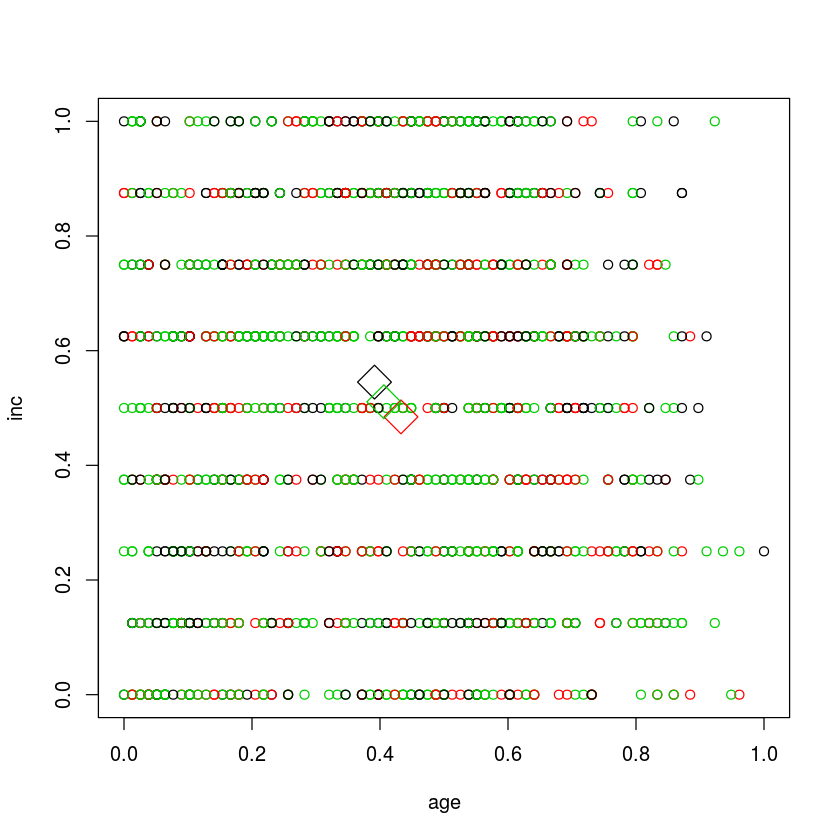

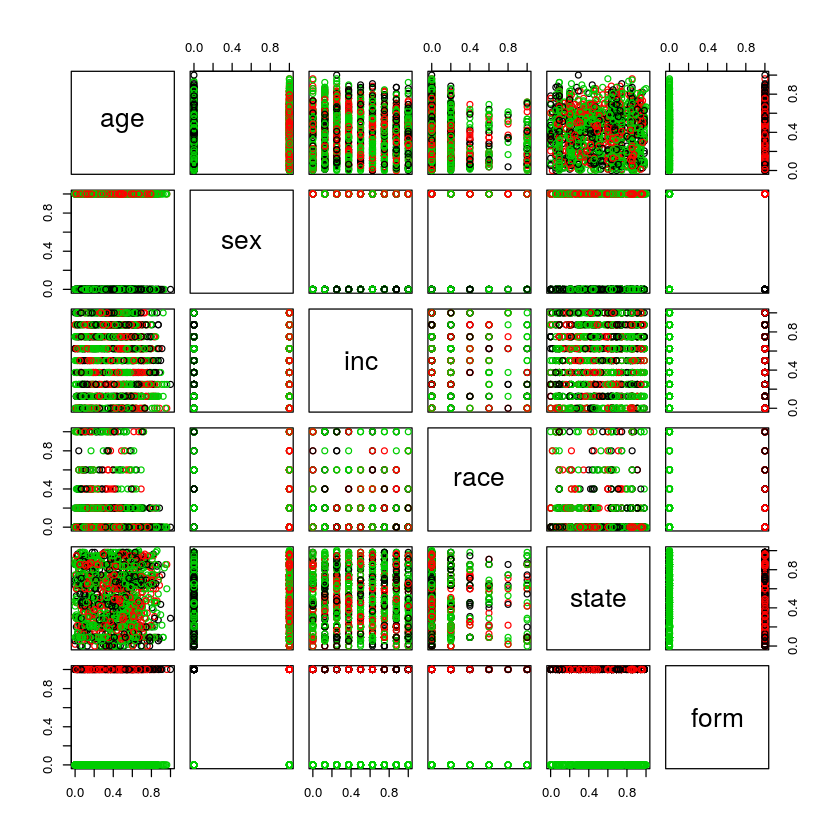

In [302]:
#Ploting the Result
table(data$age,km$cluster)
plot(data[c("age", "inc")], col=km$cluster)
points(km$centers[,c("age", "inc")], col=1:3, pch=23, cex=3)

plot(data[c('age','sex','inc', 'race', 'state', 'form')], col=km$cluster)
points(km$centers[,c('age','sex','inc', 'race', 'state', 'form')], col=1:3, pch=23, cex=3)

In [303]:
#data$age1 <- (data$age - min(data$age))/(max(data$age)-min(data$age))
#data$sex1 <- (data$sex - min(data$sex))/(max(data$sex)-min(data$sex))
#data$inc1 <- (data$inc - min(data$inc))/(max(data$inc)-min(data$inc))
#data$race1 <- (data$race - min(data$race))/(max(data$race)-min(data$race))
#data$state1 <- (data$state - min(data$state))/(max(data$state)-min(data$state))
#data$form1 <- (data$form - min(data$form))/(max(data$form)-min(data$form))


data

,age,sex,inc,race,state,form
2,0.57692308,1,0.625,0.2,0.41818182,1
3,0.87179487,1,0.250,0.0,0.69090909,1
4,0.28205128,1,0.625,0.0,0.65454545,1
5,0.60256410,1,0.250,0.0,0.36363636,0
6,0.65384615,1,0.875,0.0,0.34545455,0
8,0.66666667,0,0.750,0.0,0.45454545,0
9,0.75641026,0,0.625,0.0,0.70909091,1
10,0.70512821,0,0.250,0.0,0.40000000,0
13,0.43589744,0,0.875,0.0,0.47272727,0
14,0.71794872,1,0.625,0.0,0.20000000,0


# Cluster Result for K=3:

|cluster|age|sex|inc|race|state|form|
|---|---|---|---|---|---|---|
|1 |61.21639 |1.567213 |98.616393 |1.904918| 29.88525 |1.462295 |
|2 |52.02921 |1.486517  |5.147191 |1.562921 |41.98427 |1.523596 |
|3 |48.74814 |1.503722  |5.110422 |1.677419 |13.89082 |1.524814 |

## Cluster with K = 5

In [304]:
#Find the kmean using the Normalized data frame
centers <- 5
km <- kmeans(data, centers, iter.max = 10, nstart = 1,algorithm = c("Hartigan-Wong", "Lloyd", "Forgy","MacQueen"))
km


#Or without specifing the algorithm
km2 <- kmeans(data, centers)

K-means clustering with 5 clusters of sizes 384, 128, 146, 863, 125

Cluster means:
        age       sex       inc       race     state form
1 0.3902244 0.0000000 0.5416667 0.10677083 0.5276515    0
2 0.3841146 1.0000000 0.6484375 0.02968750 0.7916193    0
3 0.4423077 1.0000000 0.1464041 0.15616438 0.4531756    0
4 0.4115043 0.4866744 0.5156431 0.09826188 0.4946171    1
5 0.4346667 1.0000000 0.7010000 0.06240000 0.2097455    0

Clustering vector:
   2    3    4    5    6    8    9   10   13   14   16   17   18   20   21   22 
   4    4    4    3    5    1    4    1    1    5    4    4    4    4    3    1 
  23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38 
   4    4    4    2    2    4    4    4    4    2    4    4    4    4    4    1 
  39   40   41   42   43   44   45   47   49   50   51   52   53   55   56   57 
   3    1    3    3    4    4    4    4    4    4    2    1    4    4    3    1 
  58   59   60   61   63   64   66   67   68   69   70   71   

In [305]:
km2[2]
km_scale <- as.data.frame(km2$centers)
#km_scale <- as.data.frame(km_scale)

#Converting the Scaled value to the normal value
km_scale$age <-  (km_scale$age)*scale_age
km_scale$sex <-  (km_scale$sex)*scale_sex
km_scale$inc <-  (km_scale$inc)*scale_inc
km_scale$race <-  (km_scale$race)*scale_race
km_scale$state <-  (km_scale$state)*scale_state
km_scale$form <-  (km_scale$form)*scale_form
km_scale

,age,sex,inc,race,state,form
1,0.3526071,0,0.2139262,0.16107383,0.5393533,0
2,0.4327228,1,0.4845238,0.09857143,0.5027706,1
3,0.4140753,0,0.7494681,0.07234043,0.5202321,0
4,0.4212454,1,0.4812030,0.08621554,0.4854864,0
5,0.3913874,0,0.5451467,0.09796840,0.4868869,1


age,sex,inc,race,state,form
33.85028,0,1.925336,0.9664430,30.20378,0
41.54139,2,4.360714,0.5914286,28.15515,2
39.75123,0,6.745213,0.4340426,29.13300,0
40.43956,2,4.330827,0.5172932,27.18724,0
37.57319,0,4.906321,0.5878104,27.26567,2


In [306]:
#Using the Non Normalized Data Frame to calculate the kmeans
km3 <- kmeans(data2, centers)
km3[2]

,age,sex,inc,race,state,form
1,50.38535,1.503185,5.566879,1.503185,15.55732,1.515924
2,70.04633,1.590734,5.054054,1.266409,14.48263,1.528958
3,31.61739,1.449275,5.133333,1.556522,42.97971,1.515942
4,28.26104,1.449799,4.610442,1.931727,12.65060,1.526104
5,63.08559,1.503132,5.073069,1.313152,42.39457,1.532359


                    
                      1  2  3  4  5
  0                   4  2  1  7  1
  0.0128205128205128  8  2  2 11  0
  0.0256410256410256  7  5  2 13  0
  0.0384615384615385  4  2  3 10  1
  0.0512820512820513  3  1  6 17  2
  0.0641025641025641  4  1  4 15  2
  0.0769230769230769 10  1  6 11  1
  0.0897435897435897  9  2  1 12  0
  0.102564102564103   7  3  4 21  2
  0.115384615384615   3  1  0  9  0
  0.128205128205128   6  1  1 14  2
  0.141025641025641   7  0  0 12  1
  0.153846153846154   7  3  3 15  3
  0.166666666666667   4  1  4 13  3
  0.179487179487179   9  2  0 17  0
  0.192307692307692   6  0  2 11  2
  0.205128205128205   5  5  0 12  1
  0.217948717948718  10  1  1 16  3
  0.230769230769231   5  4  1  9  2
  0.243589743589744   1  5  0  9  4
  0.256410256410256   6  1  2 12  0
  0.269230769230769   1  2  1 10  1
  0.282051282051282   6  2  2 10  1
  0.294871794871795   4  0  0  8  1
  0.307692307692308   8  1  0  7  2
  0.320512820512821   4  1  0 12  3
  0.333

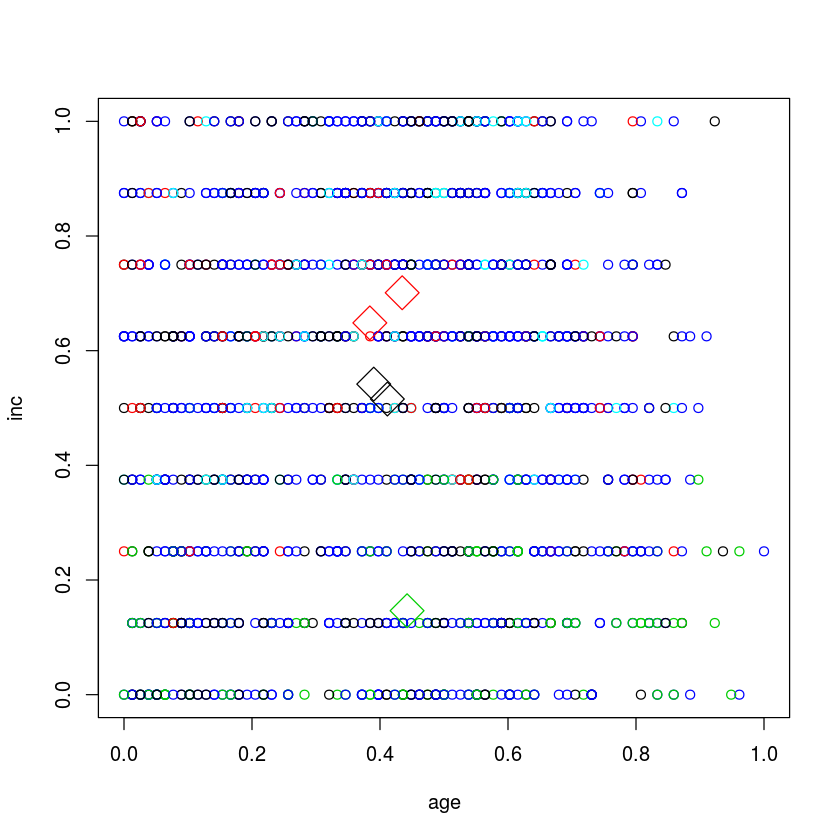

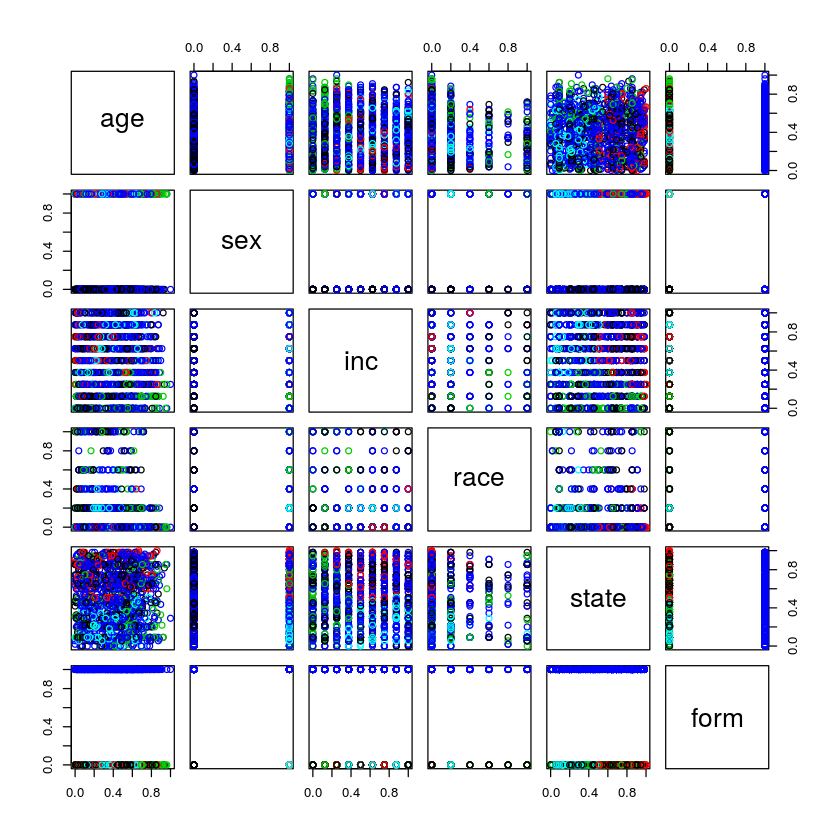

In [307]:
#Ploting the Result
table(data$age,km$cluster)
plot(data[c("age", "inc")], col=km$cluster)
points(km$centers[,c("age", "inc")], col=1:3, pch=23, cex=3)

plot(data[c('age','sex','inc', 'race', 'state', 'form')], col=km$cluster)
points(km$centers[,c('age','sex','inc', 'race', 'state', 'form')], col=1:7, pch=23, cex=3)

# Interpretation the cluster characteristics for various K = 3, 5.
### 1)From the observation of the result for the data set above we could see that as K increases we get more near by clusters. With respect to this dataset we could see that for k=3 the clusters are in  fig(a) and k=5 the cluster are in fig(b) as shown below.
### 2) It can also be observed that the categorical data in the input can cause mis-understanding of the results. Kmean is applicable for continous data as the categorical data can not be used to find the exact cluster locations.
### 3) Normalization should be done before the kmean as it can cause wrong result and observations.

# Cluster Result for K=3:

|cluster|age|sex|inc|race|state|form|
|---|---|---|---|---|---|---|
|1 |61.21639 |1.567213 |98.616393 |1.904918| 29.88525 |1.462295 |
|2 |52.02921 |1.486517  |5.147191 |1.562921 |41.98427 |1.523596 |
|3 |48.74814 |1.503722  |5.110422 |1.677419 |13.89082 |1.524814 |

# Cluster Result for K=5:

|cluster|age|sex|inc|race|state|form|
|---|---|---|---|---|---|---|
 |1 |32.87500 |1.474432  |4.883523 |1.911932 |12.74148 |1.542614 |
 |2 |63.02754 |1.533898  |5.302966 |1.495763 |15.17161 |1.519068 |
 |3 |65.24528 |1.492662  |5.071279 |1.423480 |42.17400 |1.528302 |
 |4 |33.30127 |1.468354  |5.212658 |1.734177 |42.52911 |1.508861 |
 |5 |61.21639 |1.567213 |98.616393 |1.904918 |29.88525 |1.462295 |